Multi-fidelity Modeling and Experimental Design (Active Learning)

In [1]:
# General imports

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays
np.random.seed(20)

from emukit.multi_fidelity.models.non_linear_multi_fidelity_model import make_non_linear_kernels, NonLinearMultiFidelityModel

In [2]:
data = np.genfromtxt('Ge77Rates_v1.csv',
                     dtype=None,
                     delimiter=',',
                    skip_header = 1)
print(data)

[( 0,   0, b'LF',  76,  8.71779789, 0.00058819, 6.74893109e-05, 0.02263486, 0.00263706,    50000,  129211)
 ( 1,  95, b'LF',  42,  6.4807407 , 0.00033422, 5.15801823e-05, 0.01286171, 0.00200185,    50000,  125665)
 ( 2, 100, b'LF',  41,  6.40312424, 0.00032655, 5.10068864e-05, 0.01256648, 0.0019792 ,    50000,  125555)
 ( 3, 104, b'LF',  56,  7.48331477, 0.00044449, 5.94107148e-05, 0.01710511, 0.00231221,    50000,  125987)
 ( 4, 108, b'LF',  42,  6.4807407 , 0.00033482, 5.16727165e-05, 0.01288478, 0.00200544,    50000,  125440)
 ( 5, 112, b'LF',  45,  6.70820393, 0.00035912, 5.35446180e-05, 0.01381999, 0.00207934,    50000,  125305)
 ( 6, 116, b'LF',  43,  6.55743852, 0.00034325, 5.23541693e-05, 0.01320914, 0.00203229,    50000,  125273)
 ( 7, 120, b'LF',  40,  6.32455532, 0.00032115, 5.07861778e-05, 0.01235861, 0.00197024,    50000,  124553)
 ( 8, 124, b'LF',  39,  6.244998  , 0.00031332, 5.01789631e-05, 0.01205729, 0.0019463 ,    50000,  124474)
 ( 9, 128, b'LF',  50,  7.07106781, 0

 /tmp/ipykernel_1124588/1819982242.py:1: VisibleDeprecationWarning:Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


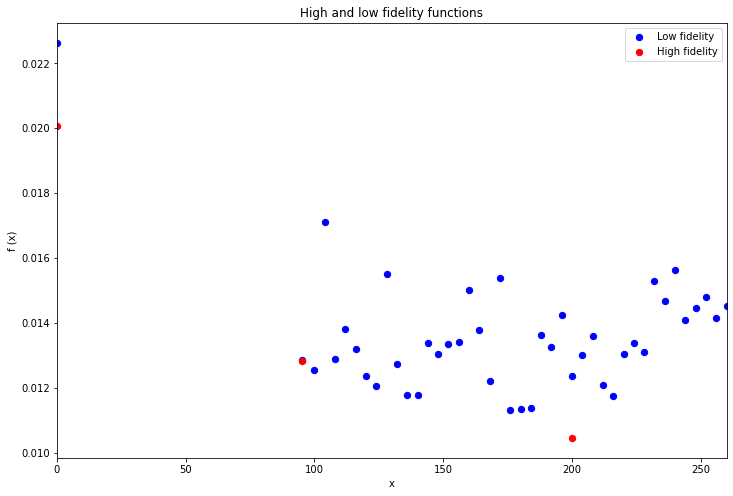

In [3]:
x_train_l, x_train_h, y_train_l, y_train_h = ([],[],[],[])
n_low_fidelity_points = 0
n_high_fidelity_points = 0
error_low = []
error_hi = []
for entry in data:
    if entry[2] == b'LF':
        x_train_l.append(entry[1])
        y_train_l.append(entry[-4])
        error_low.append(entry[-3])
    else:
        x_train_h.append(entry[1])
        y_train_h.append(entry[-4])
        error_hi.append(entry[-3])

x_train_l, x_train_h, y_train_l, y_train_h = (np.atleast_2d(x_train_l).T, np.atleast_2d(x_train_h).T, np.atleast_2d(y_train_l).T, np.atleast_2d(y_train_h).T)

X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])


plt.figure(figsize=(12, 8))
plt.scatter(x_train_l, y_train_l, color='b', s=40)
plt.scatter(x_train_h, y_train_h, color='r', s=40)
plt.xlabel('x')
plt.ylabel('f (x)')
plt.xlim([0, 260])
plt.legend(['Low fidelity', 'High fidelity'])
plt.title('High and low fidelity functions');

In [4]:
# Construct a linear multi-fidelity model

kernels = [GPy.kern.RBF(1), GPy.kern.RBF(1)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(1e-6)
'''
The Low Fidelity noise level need to be independently estimated. Here I provide a guess of 5e-7
'''
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

## Wrap the model using the given 'GPyMultiOutputWrapper'

lin_mf_model = model = GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=20)

## Fit the model
  
lin_mf_model.optimize()
nonlin_mf_model = lin_mf_model

 /global/homes/l/liaobo77/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/20, f = -233.98666101895293
Optimization restart 2/20, f = -233.98666102461223
Optimization restart 3/20, f = -233.9866610246003
Optimization restart 4/20, f = -142.8804854811264
Optimization restart 5/20, f = -142.88048579672042
Optimization restart 6/20, f = -142.88048567411784
Optimization restart 7/20, f = -142.8804854374393
Optimization restart 8/20, f = -142.8804854968028
Optimization restart 9/20, f = -233.98666102388302
Optimization restart 10/20, f = -233.98666102461607
Optimization restart 11/20, f = -233.98666102205004
Optimization restart 12/20, f = -142.88048460176554
Optimization restart 13/20, f = -142.88046056947928
Optimization restart 14/20, f = -233.9866610246641
Optimization restart 15/20, f = -233.9866610244394
Optimization restart 16/20, f = -142.8804855614809
Optimization restart 17/20, f = -142.88048430446878
Optimization restart 18/20, f = -233.9866610112891
Optimization restart 19/20, f = -142.88048055370615
Optimization restart 20/20, f

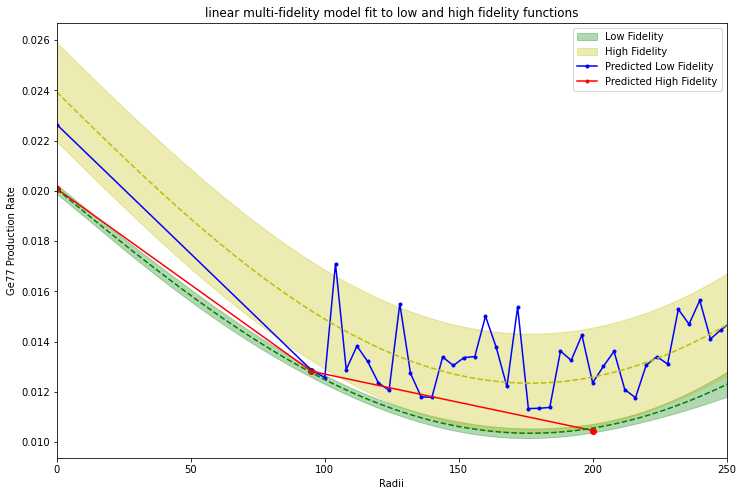

In [5]:
SPLIT = 200
## Compute mean and variance predictions
x_plot = np.linspace(0, 264, SPLIT)[:, None]
X_plot = convert_x_list_to_array([x_plot, x_plot])

hf_mean_nonlin_mf_model, hf_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot[:SPLIT])
hf_std_nonlin_mf_model = np.sqrt(hf_var_nonlin_mf_model)

lf_mean_nonlin_mf_model, lf_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot[SPLIT:])
lf_std_nonlin_mf_model = np.sqrt(lf_var_nonlin_mf_model)


## Plot posterior mean and variance of nonlinear multi-fidelity model

plt.figure(figsize=(12,8))
plt.fill_between(x_plot.flatten(), (lf_mean_nonlin_mf_model - 1.96*lf_std_nonlin_mf_model).flatten(), 
                 (lf_mean_nonlin_mf_model + 1.96*lf_std_nonlin_mf_model).flatten(), color='g', alpha=0.3)
plt.fill_between(x_plot.flatten(), (hf_mean_nonlin_mf_model - 1.96*hf_std_nonlin_mf_model).flatten(), 
                 (hf_mean_nonlin_mf_model + 1.96*hf_std_nonlin_mf_model).flatten(), color='y', alpha=0.3)
plt.plot(x_train_l, y_train_l, 'b',marker=".")
plt.plot(x_train_h, y_train_h, 'r',marker=".")
plt.plot(x_plot, lf_mean_nonlin_mf_model, '--', color='g')
plt.plot(x_plot, hf_mean_nonlin_mf_model, '--', color='y')
plt.scatter(x_train_h, y_train_h, color='r')
plt.xlabel('Radii')
plt.ylabel('Ge77 Production Rate')
plt.xlim(0, 250)
plt.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', 'Predicted High Fidelity'])
plt.title('linear multi-fidelity model fit to low and high fidelity functions');

# Acqusition Curve
- The acquisition curve is an important part of the active learning process. The next step we try using HF simulation dependes on where the acquisiton function takes its maximal value.
- Define a parameter space (here we only have a single parameter radius), we need to add another parameter fidelity into our data, this parameter is always 1, meaning that we always run acquisition function on the high fidelity (1) space.
- Note: it is important to deine the lower and upper range of our optimization parameter. Looking at the previous plot, anything below 80cm is probably unphysical, therefore we should not waste any attempt there. I selected a region of 90-250 to run the acquisition function. Selecting the wrong range could significantly change the shape of acquisition function.

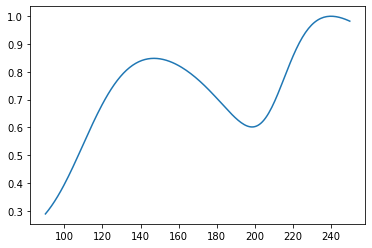

In [6]:
from emukit.experimental_design.acquisitions import ModelVariance,IntegratedVarianceReduction
from emukit.core import ParameterSpace, ContinuousParameter,DiscreteParameter
SPLIT = 200
low = 90
high =250
## Compute mean and variance predictions
x_plot = np.linspace(low, high, SPLIT)[:, None]
X_plot = convert_x_list_to_array([x_plot, x_plot])
parameter_space = ParameterSpace([ContinuousParameter('x1', low, high), DiscreteParameter("f",[1])])
us_acquisition = IntegratedVarianceReduction(nonlin_mf_model, parameter_space)
acq = us_acquisition.evaluate(X_plot[SPLIT:])
plt.plot(np.linspace(low, high, SPLIT),acq/acq.max())

Here we run a gradient-based optimizer over the acquisition function to find the next point to attempt

In [7]:
from emukit.core.optimization import GradientAcquisitionOptimizer
optimizer = GradientAcquisitionOptimizer(parameter_space)
x_new, _ = optimizer.optimize(us_acquisition)

 /global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning:invalid value encountered in true_divide


In [8]:
print(x_new)

[[240.01400146   1.        ]]


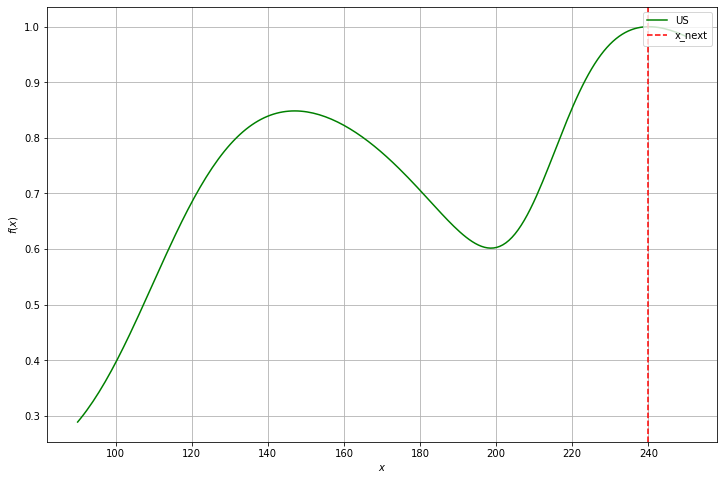

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(x_plot, acq / np.max(acq), "green", label="US")
plt.axvline(x_new[0,0], color="red", label="x_next", linestyle="--")
plt.legend(loc=1)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.grid(True)
plt.show()

Let's say we attempted another HF simulation at `x = 240.01400146`, and obtain the Ge77 production rate to be `0.012`. Then we can prepare this new HF dataset and add it back to the model.

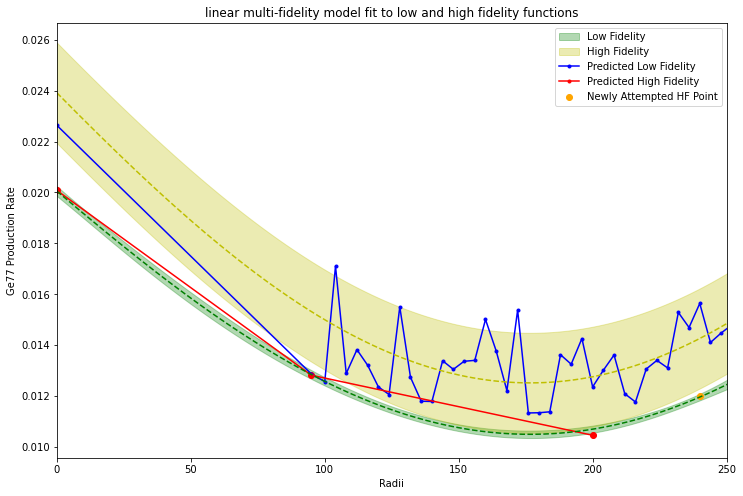

In [13]:
x_new_data = np.array([[240.01400146,1.0]])
y_new_data = np.array([[0.012]])
X_train = np.append(X_train,x_new_data,axis=0)
Y_train = np.append(Y_train,y_new_data,axis=0)
nonlin_mf_model.set_data(X_train, Y_train)

SPLIT = 200
## Compute mean and variance predictions
x_plot = np.linspace(0, 264, SPLIT)[:, None]
X_plot = convert_x_list_to_array([x_plot, x_plot])

hf_mean_nonlin_mf_model, hf_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot[:SPLIT])
hf_std_nonlin_mf_model = np.sqrt(hf_var_nonlin_mf_model)

lf_mean_nonlin_mf_model, lf_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot[SPLIT:])
lf_std_nonlin_mf_model = np.sqrt(lf_var_nonlin_mf_model)


## Plot posterior mean and variance of nonlinear multi-fidelity model

plt.figure(figsize=(12,8))
plt.fill_between(x_plot.flatten(), (lf_mean_nonlin_mf_model - 1.96*lf_std_nonlin_mf_model).flatten(), 
                 (lf_mean_nonlin_mf_model + 1.96*lf_std_nonlin_mf_model).flatten(), color='g', alpha=0.3)
plt.fill_between(x_plot.flatten(), (hf_mean_nonlin_mf_model - 1.96*hf_std_nonlin_mf_model).flatten(), 
                 (hf_mean_nonlin_mf_model + 1.96*hf_std_nonlin_mf_model).flatten(), color='y', alpha=0.3)
plt.plot(x_train_l, y_train_l, 'b',marker=".")
plt.plot(x_train_h, y_train_h, 'r',marker=".")
plt.scatter([x_new_data[0,0]], [y_new_data[0,0]],color="orange")
plt.plot(x_plot, lf_mean_nonlin_mf_model, '--', color='g')
plt.plot(x_plot, hf_mean_nonlin_mf_model, '--', color='y')
plt.scatter(x_train_h, y_train_h, color='r')
plt.xlabel('Radii')
plt.ylabel('Ge77 Production Rate')
plt.xlim(0, 250)
plt.legend(['Low Fidelity', 'High Fidelity','Predicted Low Fidelity', 'Predicted High Fidelity',"Newly Attempted HF Point"])
plt.title('linear multi-fidelity model fit to low and high fidelity functions');

Now we rerun the acquisition function and gradient finding function, we will see that it suggests a next point to try

[[161.45657808   1.        ]]


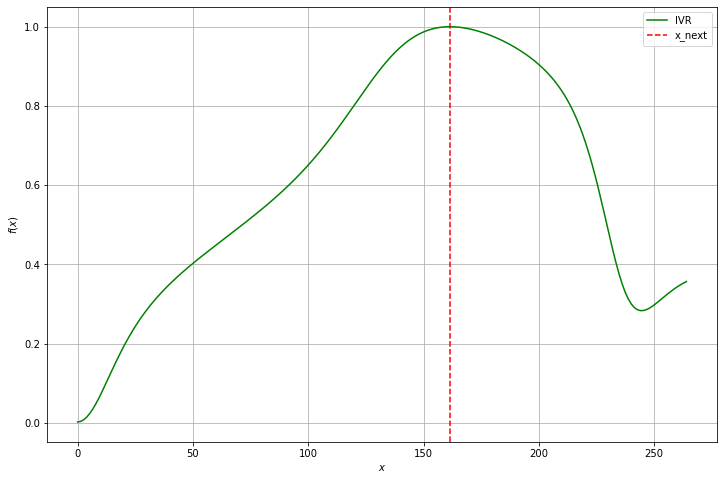

In [14]:
us_acquisition = IntegratedVarianceReduction(nonlin_mf_model, parameter_space)
acq = us_acquisition.evaluate(X_plot[SPLIT:])
optimizer = GradientAcquisitionOptimizer(parameter_space)
x_new, _ = optimizer.optimize(us_acquisition)
print(x_new)
plt.figure(figsize=(12, 8))
plt.plot(x_plot, acq / np.max(acq), "green", label="IVR")
plt.axvline(x_new[0,0], color="red", label="x_next", linestyle="--")
plt.legend(loc=1)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.grid(True)
plt.show()

Now it suggests us to attempt 161cm as the next step. We can keep looping through these procedure until we are confident with our final result.